In [75]:
import statsmodels.stats.api as sms
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier

In [76]:
data = pd.read_csv('hmelq.csv')
df = data.copy()
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [77]:
df = data.dropna() 
df.isnull().sum().any()

False

In [78]:
df.shape

(2018, 13)

In [79]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
bad,2018.0,0.088206,0.283665,0.00,0.0000,0.000,0.0000,1.000
loan,2018.0,19010.257681,10768.607345,1700.00,12000.0000,16900.000,23600.0000,89900.000
mortdue,2018.0,76337.035183,44476.368189,5076.00,49577.2500,67595.000,92922.7500,399412.000
value,2018.0,106899.244797,54026.707096,23031.00,71287.2500,94514.000,121220.7500,512650.000
yoj,2018.0,9.003964,7.573012,0.00,3.0000,7.000,13.0000,41.000
derog,2018.0,0.150149,0.580421,0.00,0.0000,0.000,0.0000,10.000
delinq,2018.0,0.264123,0.789816,0.00,0.0000,0.000,0.0000,10.000
clage,2018.0,180.645020,84.420116,0.49,118.2050,176.670,229.6925,1168.230
ninq,2018.0,1.037661,1.578414,0.00,0.0000,0.000,2.0000,13.000
clno,2018.0,22.265114,9.457238,0.00,16.0000,21.000,27.0000,64.000


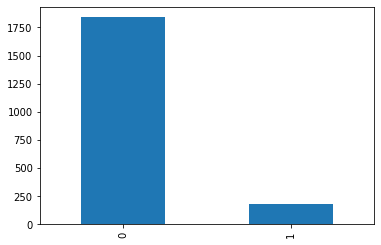

In [80]:
df['bad'].value_counts().plot.bar()

In [81]:
df['bad'].value_counts()

0    1840
1     178
Name: bad, dtype: int64

In [82]:
dms = pd.get_dummies(df[["reason", "job"]])
dms.head()

,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,1,0,1,0,0,0,0,0
154,1,0,1,0,0,0,0,0
155,1,0,1,0,0,0,0,0
156,0,1,1,0,0,0,0,0
157,1,0,1,0,0,0,0,0


In [83]:
y=df["bad"]
X_ = df.drop(["reason", "job", "bad"], axis=1).astype("float64")
X= pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_Other", "job_ProfEx", "job_Sales", "job_Self"]]], axis=1)
X.head()


,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,18200.0,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,1,0,0,0,0,0
154,21700.0,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,1,0,0,0,0,0
155,34100.0,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,1,0,0,0,0,0
156,8400.0,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,0,1,0,0,0,0,0
157,17400.0,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,1,0,0,0,0,0


In [84]:
X = X.drop(['mortdue','value','yoj','ninq','reason_DebtCon'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1816, 12)
y_train shape: (1816,)
X_test shape: (202, 12)
y_test shape: (202,)


In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
bdata = DecisionTreeClassifier()
bdata_model = bdata.fit(X_train, y_train)
bdata_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

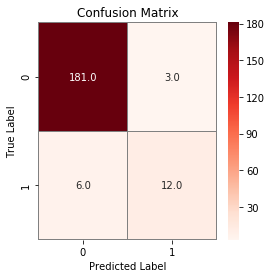

In [87]:
y_pred = bdata_model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Reds",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [88]:
accuracy_score(y_test, y_pred)

0.9554455445544554

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       184
           1       0.80      0.67      0.73        18

    accuracy                           0.96       202
   macro avg       0.88      0.83      0.85       202
weighted avg       0.95      0.96      0.95       202



In [90]:
bdata_grid = {"max_depth": range(1,10),
              "min_samples_split": list(range(2,50))}

In [91]:
bdata = tree.DecisionTreeClassifier()
bdata_cv =GridSearchCV(bank, bank_grid, cv=10, n_jobs=-1, verbose=2) 
bdata_cv_model = bank_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 3474 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   33.7s finished


In [92]:
print("En iyi parametreler: "+str(bdata_cv_model.best_params_))

En iyi parametreler: {'max_depth': 5, 'min_samples_split': 4}


In [93]:
bdata = tree.DecisionTreeClassifier(max_depth=8, min_samples_split=3)
bdata_tuned = bank.fit(X_train, y_train)

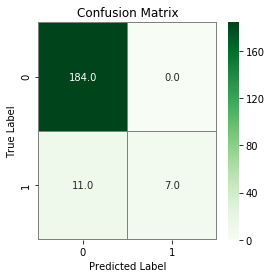

In [94]:
y_pred = bdata_tuned.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [95]:
accuracy_score(y_pred, y_test)

0.9455445544554455

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       184
           1       1.00      0.39      0.56        18

    accuracy                           0.95       202
   macro avg       0.97      0.69      0.77       202
weighted avg       0.95      0.95      0.93       202



In [97]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model

C:\Users\gamze\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rf_model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8], 
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [ ]:
rf_model = RandomForestClassifier()
rf_cv_model = GridSearchCV(rf_model,
                          rf_params,
                          cv=10,
                          n_jobs=-1,
                          verbose=5)

In [103]:
rf_cv_model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Done 183 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 309 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 471 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 669 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 903 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 10.8min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [104]:
print("En iyi parametreler: "+str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 10, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 1000}


In [105]:
rf_tuned = RandomForestClassifier(max_depth=10, max_features=2, min_samples_split=2, n_estimators=500)
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

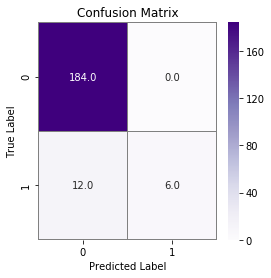

In [106]:
y_pred = rf_tuned.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [107]:
accuracy_score(y_test, y_pred)

0.9405940594059405

In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       184
           1       1.00      0.33      0.50        18

    accuracy                           0.94       202
   macro avg       0.97      0.67      0.73       202
weighted avg       0.94      0.94      0.93       202



In [109]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100}, 
                          index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyi')

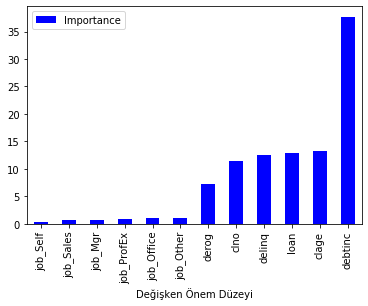

In [110]:
Importance.sort_values(by = "Importance",
                      axis=0,
                      ascending=True).plot(kind="bar", color="b")
plt.xlabel("Değişken Önem Düzeyi")

In [111]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

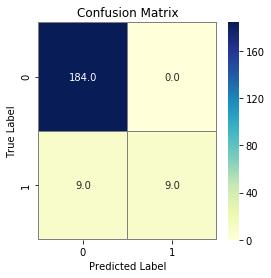

In [112]:
y_pred = gbm_model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="YlGnBu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [113]:
accuracy_score(y_test, y_pred)

0.9554455445544554

In [114]:
gbm_model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)